In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from scipy.stats import spearmanr

In [2]:
%matplotlib inline
sns.set(style="darkgrid", color_codes=True)
plt.style.use('dark_background')
rcParams['figure.figsize'] = 10, 7
warnings.filterwarnings('ignore')

In [3]:
# Read in data as pandas dataframe and display info
house_sales = pd.read_csv('kc_house_data.csv')
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


# Data Manipulation

- Column `date` is type object: Causes issues with when performing calculations 
- No null values
- convert `date` column to datetime format and create a sales year and month column 

In [4]:
house_sales['date'] = pd.to_datetime(house_sales.date).dt.strftime('%Y-%m')
house_sales['month'] = pd.to_datetime(house_sales.date).dt.strftime('%m')
house_sales['yr_sale'] = pd.to_datetime(house_sales.date).dt.strftime('%Y')

## Descriptive statistics for each column

**Numerical**

In [5]:
house_sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Categorical**

In [6]:
house_sales.describe(exclude='number')

,date,month,yr_sale
count,21613,21613,21613
unique,13,12,2
top,2015-04,05,2014
freq,2231,2414,14633


## EDA

### Explore individual feature distributions and count frequency

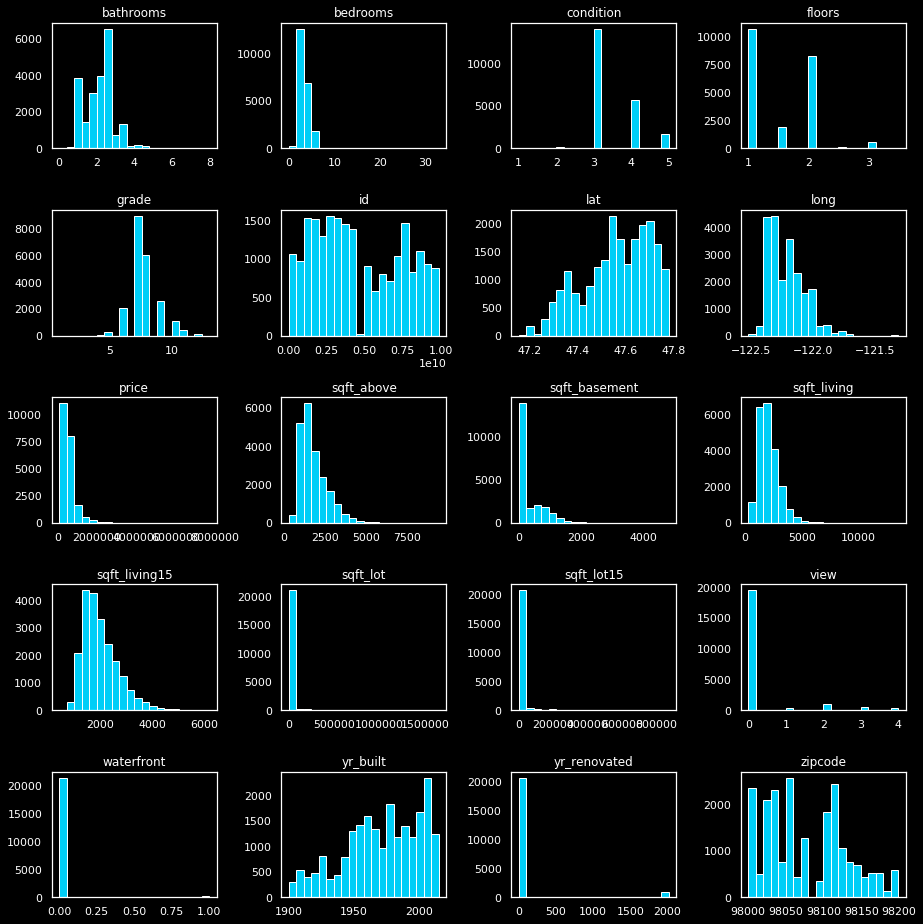

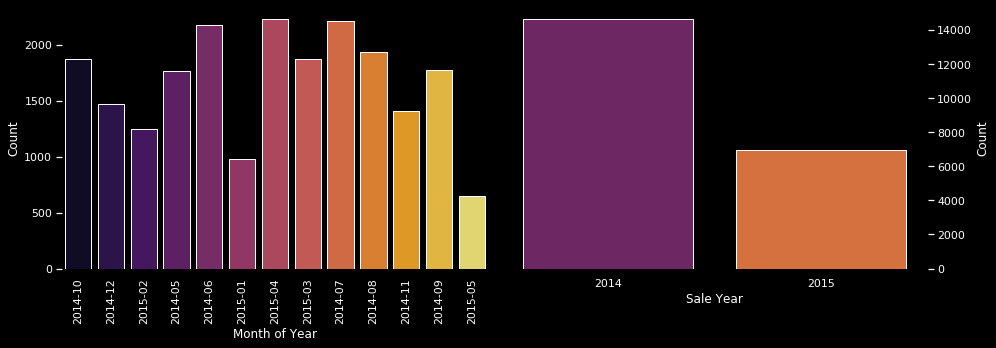

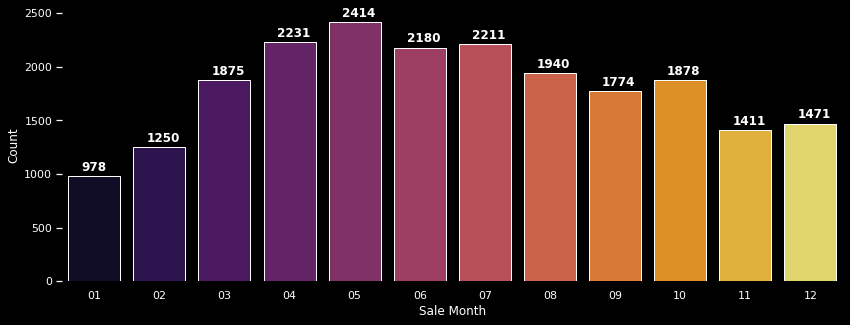

In [10]:
house_sales.hist(bins=20, figsize=(13,13), color='#00cef7', grid=False)
plt.tight_layout()
plt.show();

f, axes = plt.subplots(1, 2,figsize=(14,5))
axes[0].grid(False)
axes[1].grid(False)
sns.despine(left=True, bottom=True)
g = sns.countplot(house_sales['date'], ax=axes[0], palette='inferno')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
sns.countplot(house_sales['yr_sale'], ax=axes[1], palette='inferno')
axes[0].set(xlabel='Month of Year', ylabel='Count')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Sale Year', ylabel='Count')
plt.tight_layout()
plt.show();

f, axe = plt.subplots(1, 1,figsize=(14,5))
axe.grid(False)
sns.despine(left=True, bottom=True)
sns.countplot(house_sales['month'], ax=axe, palette='inferno')
for p in axe.patches:
        axe.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50), color='white', fontweight='bold', fontsize=12)
        axe.yaxis.tick_left()
        axe.set(xlabel='Sale Month', ylabel='Count')

### Plot Categorical features against the target 

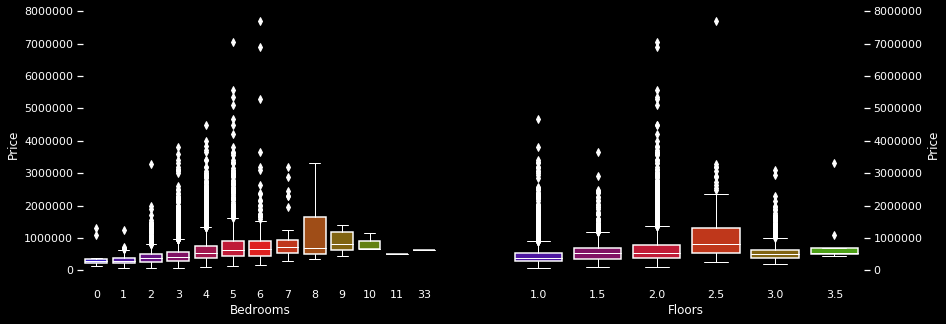

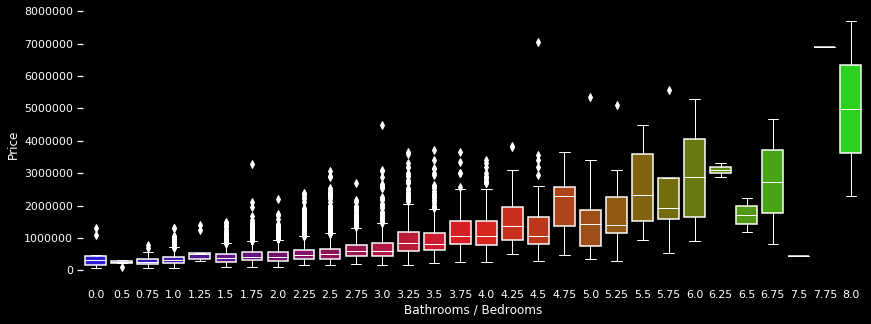

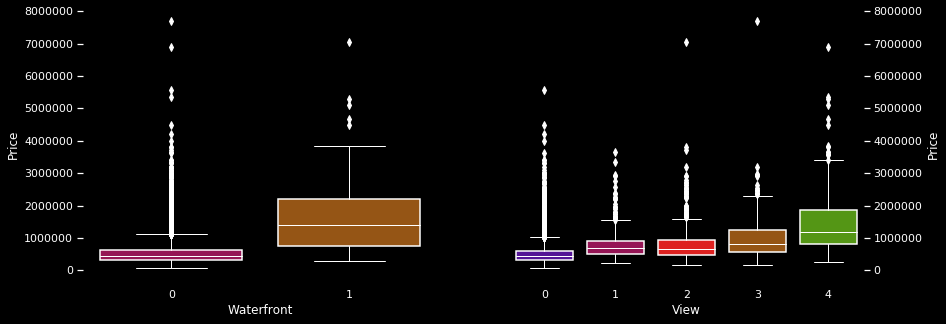

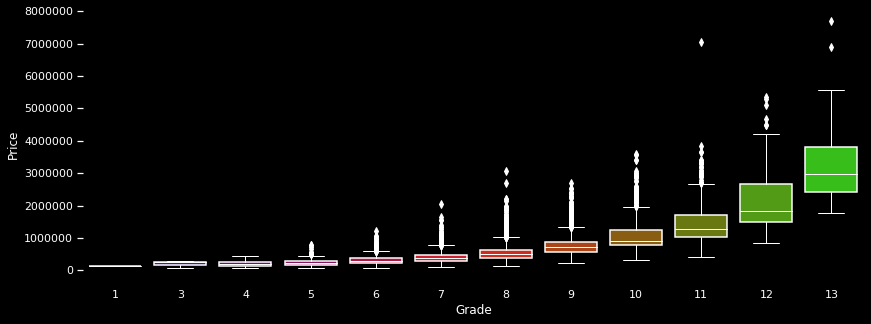

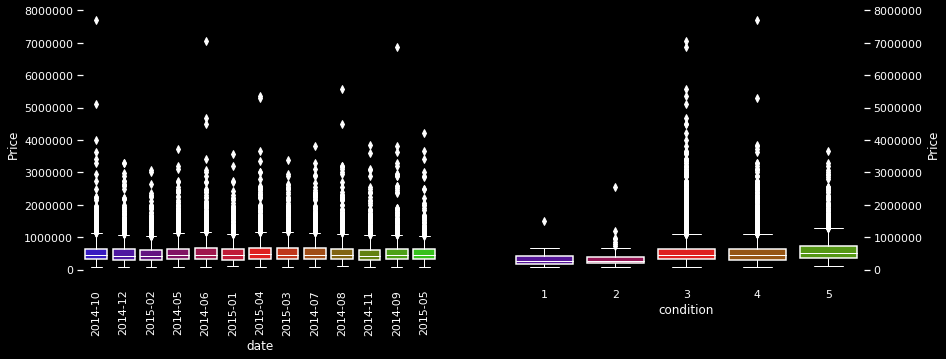

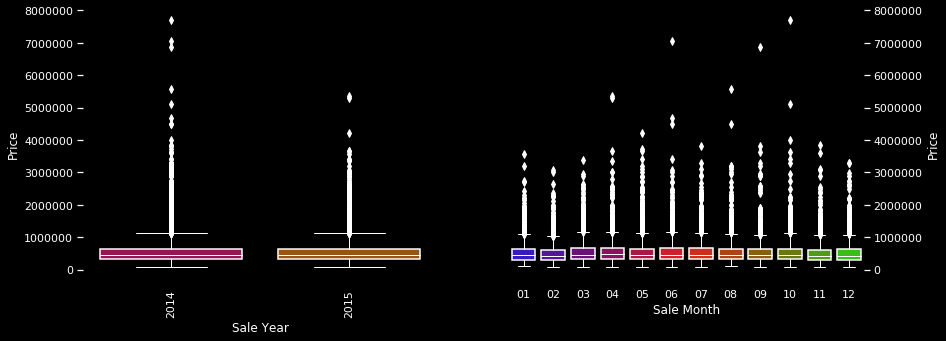

In [31]:
f, axes = plt.subplots(1, 2,figsize=(14,5))
j = sns.boxplot(x=house_sales['bedrooms'],y=house_sales['price'], ax=axes[0], palette='brg')
plt.setp(j.lines, color='w', mec='w', mfc='w', linewidth=1)
plt.setp(j.artists, edgecolor = 'w')
axes[0].grid(False)
a = sns.boxplot(x=house_sales['floors'],y=house_sales['price'], ax=axes[1], palette='brg')
plt.setp(a.lines, color='w', mec='w', mfc='w', linewidth=1)
plt.setp(a.artists, edgecolor = 'w')
axes[1].grid(False)
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(14,5))
sns.despine(left=True, bottom=True)
b = sns.boxplot(x=house_sales['bathrooms'],y=house_sales['price'], ax=axe, palette='brg')
plt.setp(b.lines, color='w', mec='w', mfc='w', linewidth=1)
plt.setp(b.artists, edgecolor = 'w')
axe.grid(False)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price');

f, axes = plt.subplots(1, 2,figsize=(14,5))
c = sns.boxplot(x=house_sales['waterfront'],y=house_sales['price'], ax=axes[0], palette='brg')
plt.setp(c.lines, color='w', mec='w', mfc='w', linewidth=1)
plt.setp(c.artists, edgecolor = 'w')
axes[0].grid(False)
d = sns.boxplot(x=house_sales['view'],y=house_sales['price'], ax=axes[1], palette='brg')
plt.setp(d.lines, color='w', mec='w', mfc='w', linewidth=1)
plt.setp(d.artists, edgecolor = 'w')
axes[1].grid(False)
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(14,5))
e = sns.boxplot(x=house_sales['grade'],y=house_sales['price'], ax=axe, palette='brg')
plt.setp(e.lines, color='w', mec='w', mfc='w', linewidth=1)
plt.setp(e.artists, edgecolor = 'w')
axe.grid(False)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');

f, axes = plt.subplots(1, 2,figsize=(14,5))
g = sns.boxplot(x=house_sales['date'],y=house_sales['price'], ax=axes[0], palette='brg')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.setp(g.lines, color='w', mec='w', mfc='w', linewidth=1)
plt.setp(g.artists, edgecolor = 'w')
axes[0].grid(False)
h = sns.boxplot(x=house_sales['condition'],y=house_sales['price'], ax=axes[1], palette='brg')
plt.setp(h.lines, color='w', mec='w', mfc='w', linewidth=1)
plt.setp(h.artists, edgecolor = 'w')
axes[1].grid(False)
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='date', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='condition', ylabel='Price');

f, axes = plt.subplots(1, 2,figsize=(14,5))
g = sns.boxplot(x=house_sales['yr_sale'],y=house_sales['price'], ax=axes[0], palette='brg')
plt.setp(g.lines, color='w', mec='w', mfc='w', linewidth=1)
plt.setp(g.artists, edgecolor = 'w')
axes[0].grid(False)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
k = sns.boxplot(x=house_sales['month'],y=house_sales['price'], ax=axes[1], palette='brg')
plt.setp(k.lines, color='w', mec='w', mfc='w', linewidth=1)
plt.setp(k.artists, edgecolor = 'w')
axes[1].grid(False)
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Sale Year', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Sale Month', ylabel='Price');

### Plot 3D spaces between features 

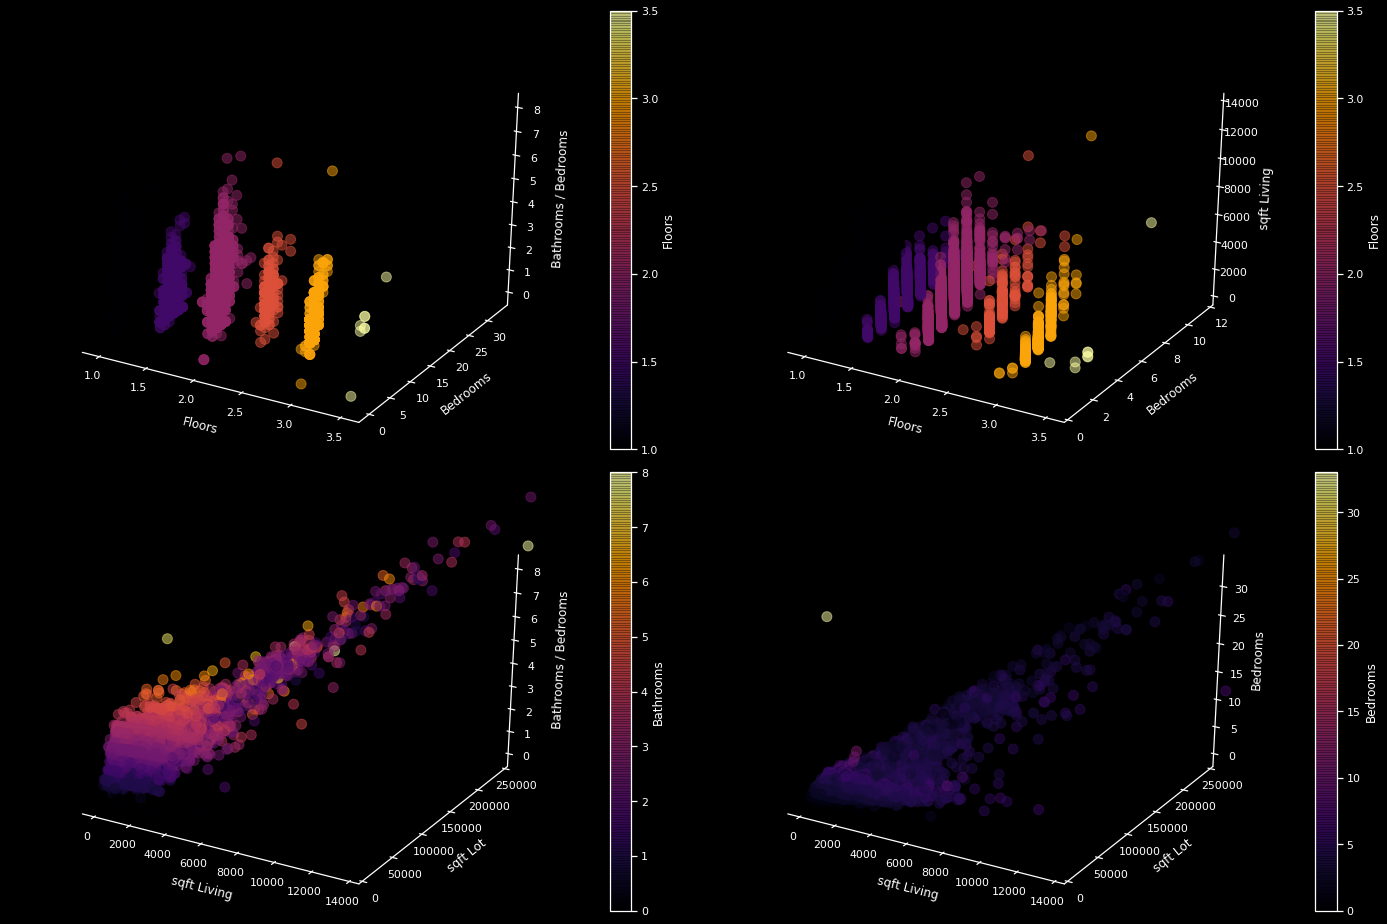

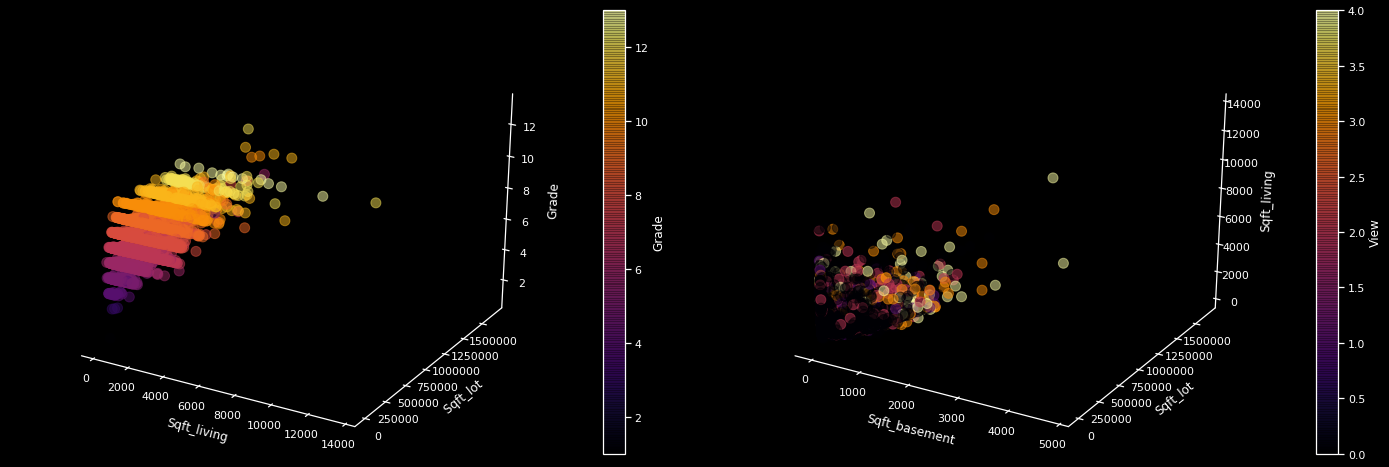

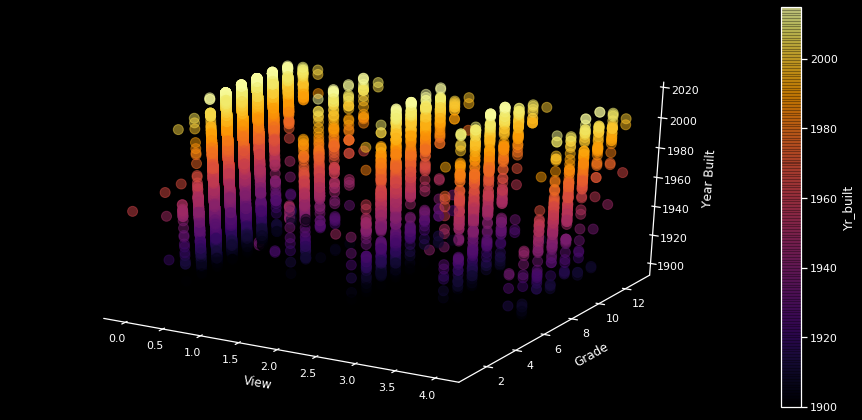

In [57]:
fig=plt.figure(figsize=(20,13))
ax=fig.add_subplot(2,2,1, projection="3d")
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.grid(False)
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
pnt3d = ax.scatter(house_sales['floors'],house_sales['bedrooms'],house_sales['bathrooms'],c=house_sales['floors'],alpha=.5, s=100,
                   cmap='inferno')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Floors")
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms / Bedrooms')

ax=fig.add_subplot(2,2,2, projection="3d")
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.grid(False)
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
pnt3d = ax.scatter(house_sales['floors'],house_sales['bedrooms'],house_sales['sqft_living'],c=house_sales['floors'],alpha=.5, s=100,
                   cmap='inferno')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Floors")
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection="3d")
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.grid(False)
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
pnt3d = ax.scatter(house_sales['sqft_living'],house_sales['sqft_lot'],house_sales['bathrooms'],c=house_sales['bathrooms'],alpha=.5, s=100,
                   cmap='inferno')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Bathrooms")
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4, projection="3d")
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.grid(False)
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
pnt3d = ax.scatter(house_sales['sqft_living'],house_sales['sqft_lot'],house_sales['bedrooms'],c=house_sales['bedrooms'],alpha=.5, s=100,
                   cmap='inferno')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Bedrooms")
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='Bedrooms')
ax.set(ylim=[0,250000])
plt.tight_layout()
plt.show();

fig=plt.figure(figsize=(20,13))
ax=fig.add_subplot(2,2,1, projection="3d")
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.grid(False)
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
pnt3d = ax.scatter(house_sales['sqft_living'],house_sales['sqft_lot'],house_sales['grade'],c=house_sales['grade'],alpha=.5, s=100,
                   cmap='inferno')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Grade")
ax.set(xlabel='\nSqft_living',ylabel='\n Sqft_lot',zlabel='\nGrade')

ax=fig.add_subplot(2,2,2, projection="3d")
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.grid(False)
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
pnt3d = ax.scatter(house_sales['sqft_basement'],house_sales['sqft_lot'],house_sales['sqft_living'],c=house_sales['view'],alpha=.5, s=100,
                   cmap='inferno')
cbar=plt.colorbar(pnt3d)
cbar.set_label("View")
ax.set(xlabel='\nSqft_basement',ylabel='\nSqft_lot',zlabel='\nSqft_living')
plt.tight_layout()
plt.show();

fig=plt.figure(figsize=(13,6))
ax=fig.add_subplot(1,1,1, projection="3d")
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.grid(False)
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
pnt3d = ax.scatter(house_sales['view'],house_sales['grade'],house_sales['yr_built'],c=house_sales['yr_built'],alpha=.5, s=100,
                   cmap='inferno')
cbar=plt.colorbar(pnt3d)
cbar.set_label("Yr_built")
ax.set(xlabel='\nView',ylabel='\nGrade',zlabel='\nYear Built')
plt.tight_layout()
plt.show();

### Pair plot between features  

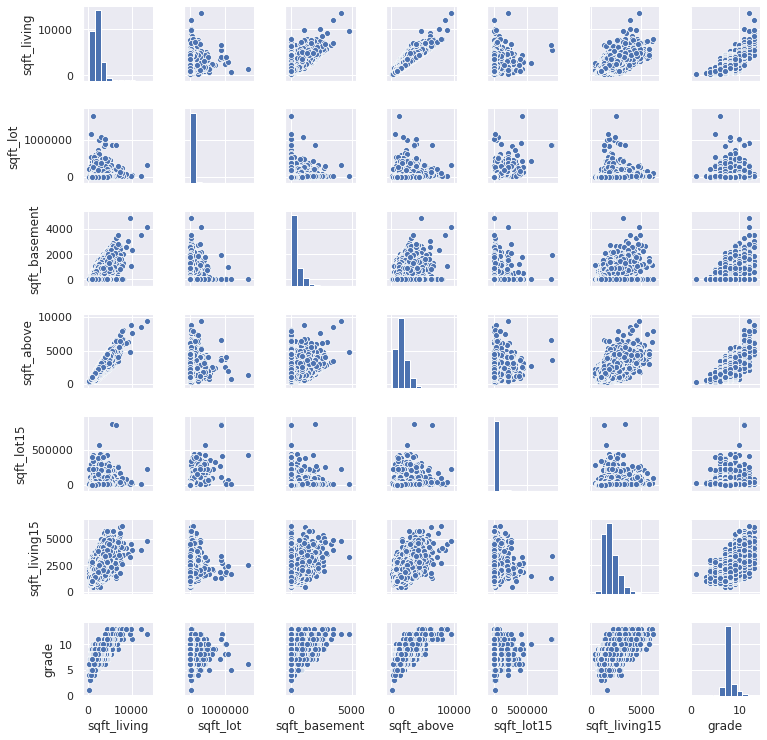

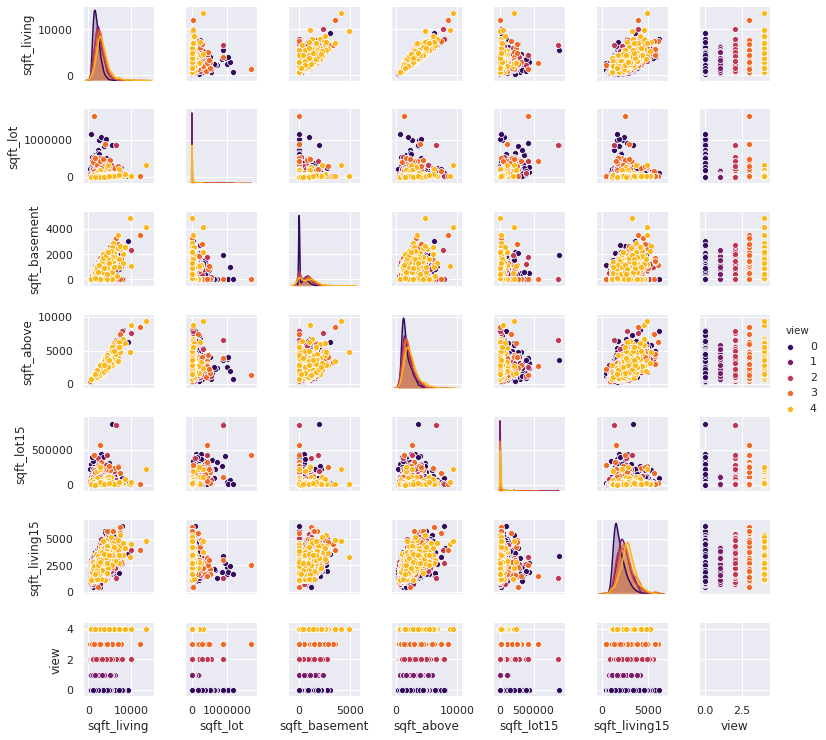

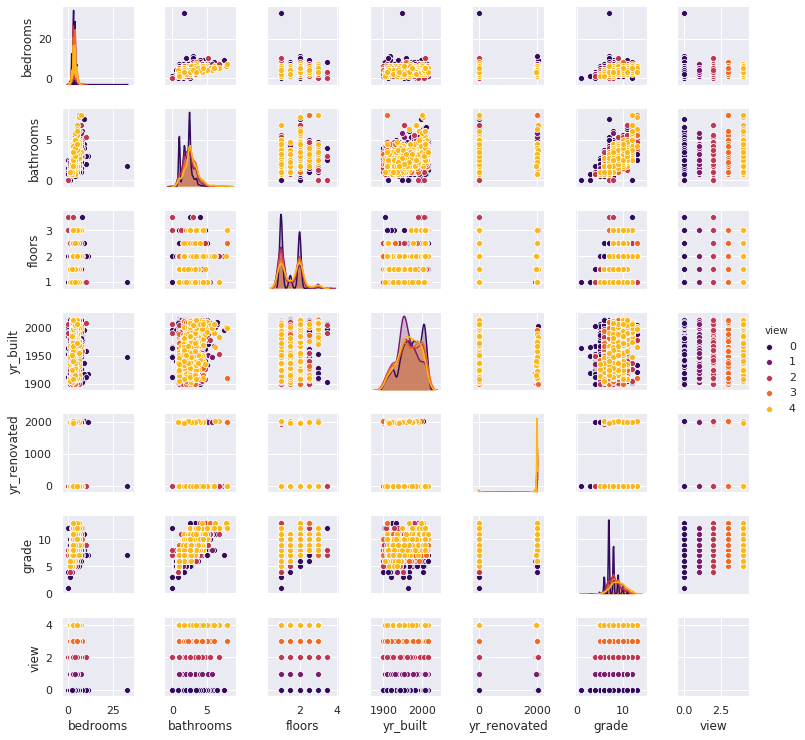

In [72]:
sns.set(style="darkgrid", color_codes=True)

sns.pairplot(house_sales[['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_above', 
                          'sqft_lot15', 'sqft_living15', 'grade']], size=1.5)
plt.show()

sns.pairplot(house_sales[['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_above', 
                          'sqft_lot15', 'sqft_living15', 'view']], size=1.5, hue="view", palette="inferno")
plt.grid(False)
plt.show()

sns.pairplot(house_sales[['bedrooms', 'bathrooms', 'floors', 'yr_built', 
                          'yr_renovated', 'grade', 'view']], size=1.5, hue="view", palette="inferno")
plt.grid(False)
plt.show()

## Transform Target

- `Log Transfom` Useful for dealing with [skewed data](http://onlinestatbook.com/2/transformations/log.html).

In [73]:
X = house_sales.drop('price', axis=1)
y = np.log(house_sales.price)

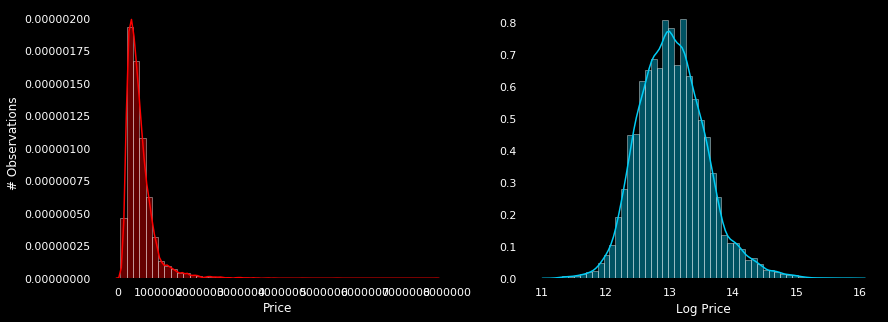

In [75]:
plt.style.use('dark_background')
f, axes = plt.subplots(1, 2,figsize=(14,5))
axes[0].grid(False)
axes[1].grid(False)
sns.distplot(house_sales.price, ax=axes[0], color='red')
sns.distplot(y, ax=axes[1], color='#00cef7')
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Price', ylabel='# Observations')
axes[1].set(xlabel='Log Price');

In [76]:
# Display feature colums for copy and pasting
X.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'yr_sale'],
      dtype='object')

In [77]:
# Slice features dataframe to control row length of scatter plots and plot mosty numeric features 
X1 = X[['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living']]
X2 = X[['sqft_lot', 'floors', 'waterfront', 'view', 'condition']]
X3 = X[['grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
X4 = X[['zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
X5 = X[['month', 'yr_sale']]

### Bivariate Scatter Plots

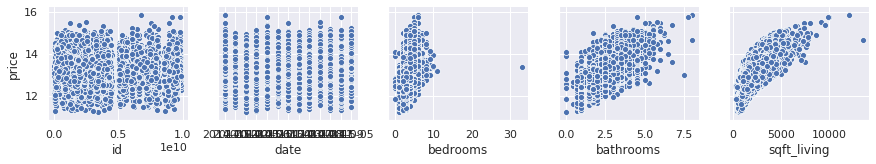

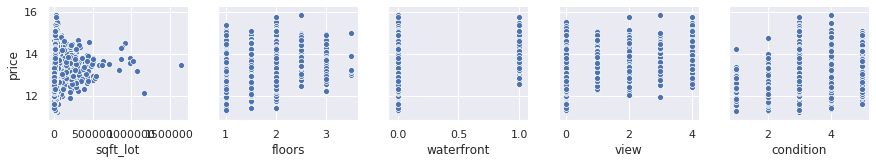

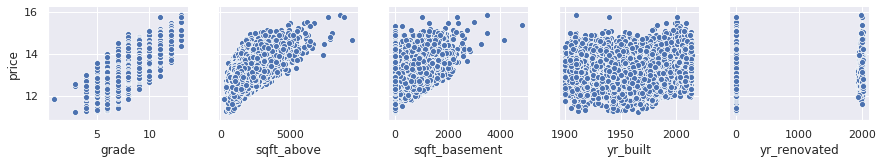

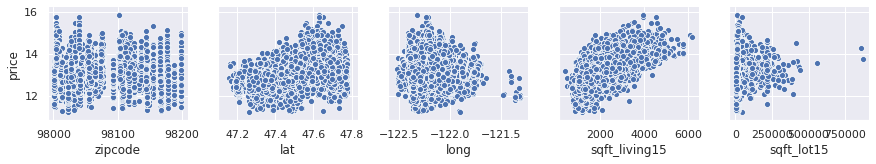

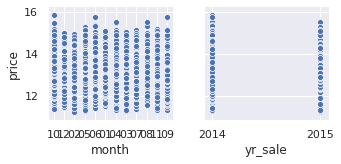

In [78]:
sns.set(style="darkgrid", color_codes=True)
sns.pairplot(X1.assign(price=y), y_vars=['price'], x_vars=X1.columns)
plt.show();
sns.pairplot(X2.assign(price=y), y_vars=['price'], x_vars=X2.columns)
plt.show();
sns.pairplot(X3.assign(price=y), y_vars=['price'], x_vars=X3.columns)
plt.show();
sns.pairplot(X4.assign(price=y), y_vars=['price'], x_vars=X4.columns)
plt.show();
sns.pairplot(X5.assign(price=y), y_vars=['price'], x_vars=X5.columns)
plt.show();

### Explore Correlations

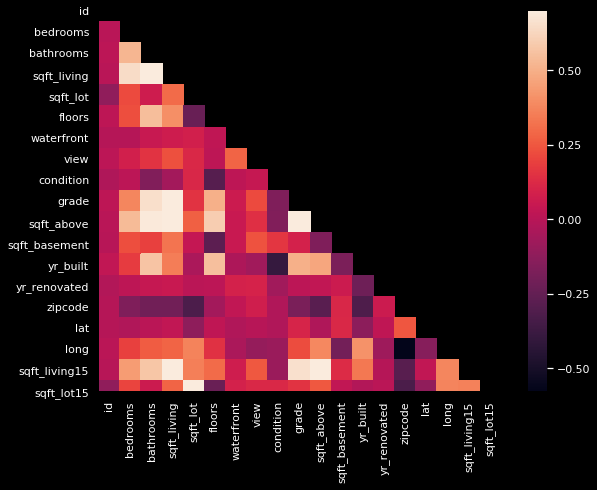

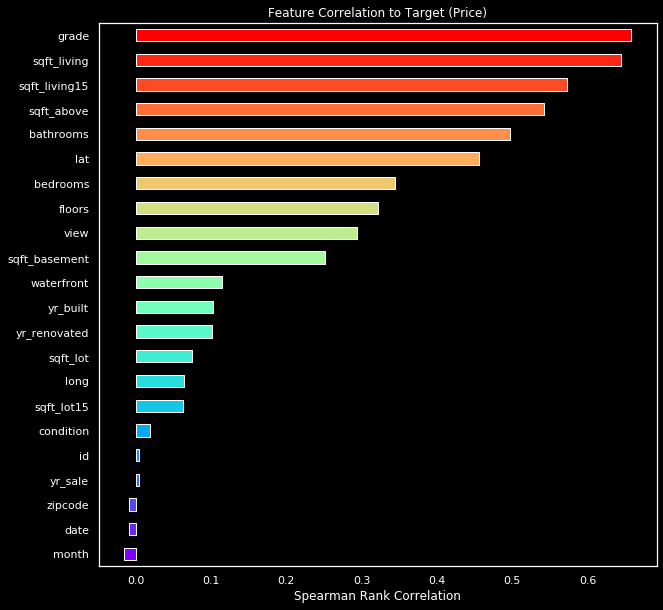

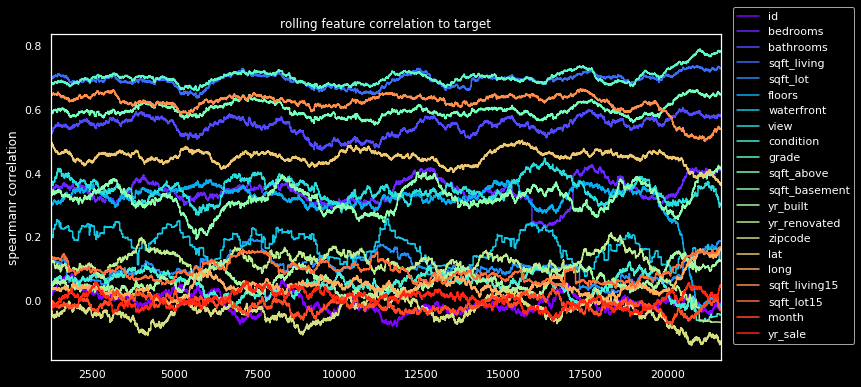

In [80]:
plt.style.use('dark_background')
mask = np.zeros_like(X.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

sns.heatmap(X.corr(method='spearman'), mask=mask, square=True, vmax=.7)
plt.show();

correl = (X
          .apply(lambda x: spearmanr(x, y))
          .apply(pd.Series, index=['r', 'pval']))

colors = cm.rainbow(np.linspace(0, 1, len(correl)))
correl.r.sort_values().plot.barh(colors=colors, figsize=(10, 10))
plt.title('Feature Correlation to Target (Price)')
plt.xlabel('Spearman Rank Correlation')
plt.grid(False)
plt.show();

X01 = X.drop('date', axis=1)
X01['month'] = X01['month'].astype(int)
X01['yr_sale'] = X01['yr_sale'].astype(int)

X01.rolling(1250).corr(y).dropna().plot(color=colors, figsize=(12, 6))
plt.legend(bbox_to_anchor=(1.01, 1.1), loc='upper left', ncol=1)
plt.title('rolling feature correlation to target')
plt.ylabel('spearmanr correlation')
plt.grid(False)
plt.show();

Rank 1D

A one-dimensional ranking of features utilizes a ranking algorithm that takes into account only a single feature at a time (e.g. histogram analysis). By default we utilize the Shapiro-Wilk algorithm to assess the normality of the distribution of instances with respect to the feature. A barplot is then drawn showing the relative ranks of each feature.

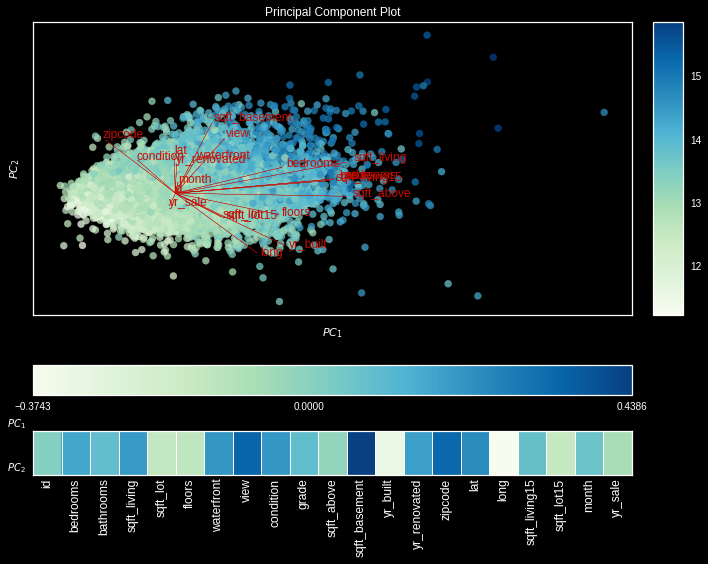

<Figure size 576x396 with 0 Axes>

In [93]:
from yellowbrick.features.pca import PCADecomposition
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 8))
ax.grid(False)
visualizer = PCADecomposition(scale=True, proj_features=True, proj_dim=3, featureslist=X01.columns, ax=ax, colormap='GnBu', heatmap=True)
visualizer.fit_transform(X01, y)
visualizer.show()
plt.tight_layout()
plt.show()

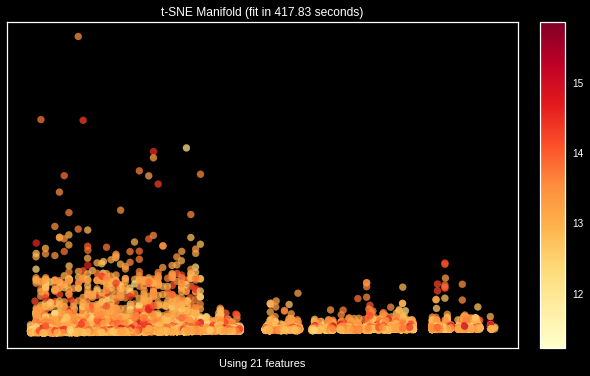

In [94]:
from yellowbrick.features import Manifold

# Instantiate the visualizer
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(False)
viz = Manifold(manifold="tsne", n_neighbors=5, ax=ax, colormap='YlOrRd')
viz.fit_transform(X01, y)  # Fit the data to the visualizer
viz.show();       

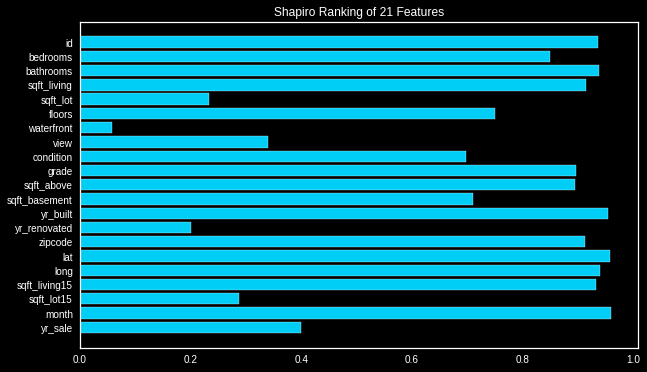

In [95]:
from yellowbrick.features import Rank1D
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(False)
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro', color='#00cef7',ax=ax)
visualizer.fit(X01, y)           # Fit the data to the visualizer
visualizer.transform(X01)       # Transform the data
visualizer.show();              # Finalize and render th

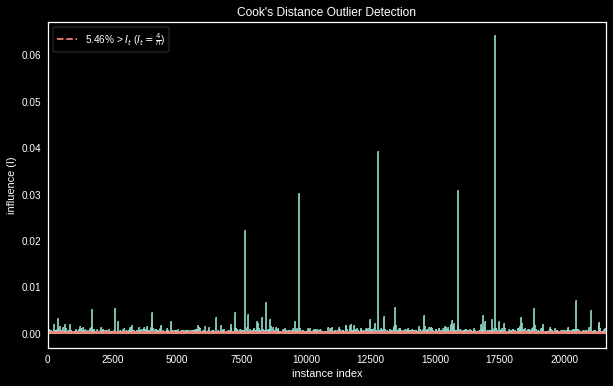

In [97]:
from yellowbrick.regressor import CooksDistance
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(False)
# Instantiate and fit the visualizer
visualizer = CooksDistance(ax=ax, color='#00cef7')
visualizer.fit(X01, y)
visualizer.show();